In [44]:
# Gamaliel Marines Olvera - A01708746



from mesa import Agent, Model 

from mesa.space import MultiGrid

from mesa.time import RandomActivation

from mesa.datacollection import DataCollector

# matplotlib lo usaremos crear una animación de cada uno de los pasos del modelo.
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.animation as animation
plt.rcParams["animation.html"] = "jshtml"
matplotlib.rcParams['animation.embed_limit'] = 2**128

# Importamos los siguientes paquetes para el mejor manejo de valores numéricos.
import numpy as np
import pandas as pd

# Definimos otros paquetes que vamos a usar para medir el tiempo de ejecución de nuestro algoritmo.
import time
import datetime


In [45]:
class CleaningAgent(Agent):
    def __init__(self, id, model):
        super().__init__(id, model)
        self.cleaning_time = 0

    def move(self):
        neighbors = self.model.grid.get_neighborhood(self.pos, moore=True, include_center=False)
        new_position = self.random.choice(neighbors)
        self.model.grid.move_agent(self, new_position)

    def step(self):
        x, y = self.pos
        if 'Dirty' in self.model.grid[x][y] and self.model.grid[x][y]['Dirty']:
            # La celda está sucia, realiza las operaciones necesarias
            self.cleaning_time += 1
            self.model.grid[x][y]['Dirty'] = False

        else:
            self.move()

In [46]:
class CleaningModel(Model):
    def __init__(self, width, height, dirty_cells, max_time):
        self.num_agents = 1
        self.grid = MultiGrid(width, height, False)
        self.schedule = RandomActivation(self)
        self.max_time = max_time

        for (x, y) in self.grid.coord_iter():
            if self.random.random() < dirty_cells:
                self.grid[x][y][0]['Dirty'] = True

        agent = CleaningAgent(self.num_agents, self)
        self.grid.place_agent(agent, (1, 1))
        self.schedule.add(agent)

        self.datacollector = DataCollector(agent_reporters={"Cleaning Time": "cleaning_time"})

    def step(self):
        self.datacollector.collect(self)
        self.schedule.step()

In [47]:
def run_cleaning_simulation(width, height, dirty_cells, max_time):
    model = CleaningModel(width, height, dirty_cells, max_time)
    for step in range(max_time):
        model.step()
        if all(not agent_pos.dirty for agent_pos in model.grid.get_all_cell_contents()):
            return step, model.datacollector.agent_vars[1]["Cleaning Time"] / model.num_agents, step * model.num_agents

    return max_time, model.datacollector.agent_vars[1]["Cleaning Time"] / model.num_agents, max_time * model.num_agents


In [48]:
WIDTH = 100
HEIGHT = 100
DIRTY_CELLS = 90  # Porcentaje de celdas sucias
MAX_GENERATIONS = 100

# Registramos el tiempo de inicio y ejecutamos la simulación
start_time = time.time()
model = CleaningModel(WIDTH, HEIGHT, int(DIRTY_CELLS / 100), MAX_GENERATIONS)
for i in range(MAX_GENERATIONS):
    model.step()
    
# Imprimimos el tiempo que le tomó correr al modelo.
print('Tiempo de ejecución:', str(datetime.timedelta(seconds=(time.time() - start_time))))

Tiempo de ejecución: 0:00:00.008343


In [41]:
# Obtenemos la información que almacenó el colector, este nos entregará un DataFrame de pandas que contiene toda la información.
all_grid = model.datacollector.get_model_vars_dataframe()

UserWarning: No model reporters have been defined in the DataCollector, returning empty DataFrame.

NameError: name 'all_grid' is not defined

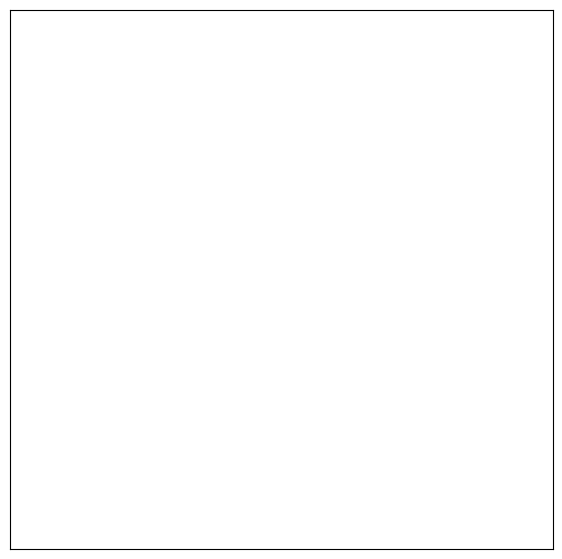

In [42]:
fig, axs = plt.subplots(figsize=(7, 7))
axs.set_xticks([])
axs.set_yticks([])
patch = plt.imshow(all_grid.iloc[0][0], cmap=plt.cm.binary)

def animate(i):
    patch.set_data(all_grid.iloc[i][0])

anim = animation.FuncAnimation(fig, animate, frames=MAX_GENERATIONS)

In [43]:
anim

NameError: name 'anim' is not defined